In [2]:
# always execute this cell first
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
from colorama import Fore, Back, Style

pd.set_option('display.max_colwidth',None) # display max columns of CSV
pd.set_option('display.max_rows',None) # display maximum  rows of CSV
twitter_df = pd.read_csv('data/twitter_data.csv')
reddit_df = pd.read_csv('data/reddit_data.csv')

#### Functions


In [3]:

def add_readable_datetime(dataFrame):
    dataFrame['datetime']=pd.to_datetime(dataFrame['posted_time'].astype(np.int64),unit='s')
    return dataFrame


def sentiment_anayled_piechart_of_coin(start_dateObj,end_dateObj,coinName):
    reddit_dataFrame=add_readable_datetime(reddit_df)
    twitter_dataFrame=add_readable_datetime(twitter_df)
    current_date=start_dateObj
    while current_date<=end_dateObj:
        filtered_reddit_df=reddit_dataFrame[(reddit_dataFrame['coin_name']==coinName) & (reddit_dataFrame['datetime'].dt.date==current_date)]
        filtered_twitter_df=twitter_dataFrame[(twitter_dataFrame['coin_name']==coinName) & (twitter_dataFrame['datetime'].dt.date==current_date)]
        # get reddit data
        if not filtered_reddit_df.empty: 
            ones = filtered_reddit_df['label'].value_counts().get(1, 0)
            zeros = filtered_reddit_df['label'].value_counts().get(0, 0)
            neg_ones = filtered_reddit_df['label'].value_counts().get(-1, 0)

            ones = 0 if pd.isna(ones) else ones
            zeros = 0 if pd.isna(zeros) else zeros
            neg_ones = 0 if pd.isna(neg_ones) else neg_ones
            
            slices=[ones,zeros,neg_ones]
            labelNames=['positives','neutral','negatives']

            plt.pie(slices,labels=labelNames,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
            plt.title(f"{current_date} chart")
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+"\nReddit Data \n",end=Style.RESET_ALL+Back.RESET+Fore.RESET)   
            plt.show()
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"postives={ones}, neutral={zeros}, negatives={neg_ones}",end=Style.RESET_ALL+Back.RESET+Fore.RESET)
            display(filtered_reddit_df.sort_values(['post_score','num_comments'],ascending=[False,False]))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        # get twitter data
        if not filtered_twitter_df.empty:
            ones = filtered_twitter_df['label'].value_counts().get(1, 0)
            zeros = filtered_twitter_df['label'].value_counts().get(0, 0)
            neg_ones = filtered_twitter_df['label'].value_counts().get(-1, 0)

            ones = 0 if pd.isna(ones) else ones
            zeros = 0 if pd.isna(zeros) else zeros
            neg_ones = 0 if pd.isna(neg_ones) else neg_ones
            
            slices=[ones,zeros,neg_ones]
            labelNames=['positives','neutral','negatives']

            plt.pie(slices,labels=labelNames,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
            plt.title(f"{current_date} chart")
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+"\ntwitter Data \n",end=Style.RESET_ALL+Back.RESET+Fore.RESET)   
            plt.show()
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"postives={ones}, neutral={zeros}, negatives={neg_ones}",end=Style.RESET_ALL+Back.RESET+Fore.RESET)  
            display(filtered_twitter_df.sort_values(['likes','replies'],ascending=[False,False]))
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date += datetime.timedelta(days=1) # increment day by day


def print_all_sorted_posts(dataFrame,sortingColumnName):
    dataFrame=dataFrame.sort_values(['datetime',sortingColumnName],ascending=[False,False])
    dataFrame=add_readable_datetime(dataFrame)
    return dataFrame


def print_info_of_coin(dataFrame,coinName):
    dataFrame=dataFrame.sort_values(by='posted_time',ascending=False)
    dataFrame=add_readable_datetime(dataFrame)
    filt = (dataFrame['coin_name'] == coinName)
    return dataFrame[filt]


def print_posts_of_given_date(dataFrame,givenDate,coinName):
    dataFrame=add_readable_datetime(dataFrame)
    filtered_df=dataFrame[(dataFrame['coin_name']==coinName) & (dataFrame['datetime'].dt.date==givenDate)]
    return filtered_df


def print_sorted_reddit_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="upvote_ratio"
    elif columnNumber == 2:
        columnName="post_score"
    elif columnNumber == 3:
        columnName="num_comments"

    dataFrame=add_readable_datetime(pd.read_csv('data/reddit_data.csv'))
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        current_date -= datetime.timedelta(days=1) # increment day by day


def print_sorted_twitter_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="likes"
    elif columnNumber == 2:
        columnName="replies"
    elif columnNumber == 3:
        columnName="views"
    elif columnNumber == 4:
        columnName="retweets"    

    dataFrame=add_readable_datetime(pd.read_csv('data/twitter_data.csv'))
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        current_date -= datetime.timedelta(days=1) # increment day by day



# def print_sorted_reddit_posts_acording_to_column_2(start_dateObj,end_dateObj,columnNumber):
#     #find column
#     columnName=1
#     if columnNumber == 1:
#         columnName="upvote_ratio"
#     elif columnNumber == 2:
#         columnName="post_score"
#     elif columnNumber == 3:
#         columnName="num_comments"
 
#     dataFrame=add_readable_datetime(reddit_df)
#     mask=(dataFrame['datetime']>=start_dateObj) & (dataFrame['datetime']<=end_dateObj)
#     dataFrame=dataFrame.loc[mask]
    
#     filtered_df=dataFrame.sort_values([columnName,'datetime'],ascending=[False,False])  
#     return filtered_df.head(100)



#### Coin Names
```
BTC
ETH *+
ETC
Avalanche(AVAX)
Solana(SOL) *+
Monero(XMR) *+
Optimism(OP)
PAX Gold(PAXG) 
Ripple(XRP) *+
Arbitrum(ARB)
Binance(BNB) *-
Cardano(ADA)
Cosmos(ATOM)
Litecoin(LTC) *+
Chainlink(LINK) 
Aave(AAVE)
Polygon(MATIC)
Gas(GAS)
```

#### Get Sorted all  data

- #####  Reddit

In [ ]:
# upvote_ratio=1,post_score=2,num_comments=3
print_sorted_reddit_posts_acording_to_column(start_dateObj=datetime.date(2023,11,17),end_dateObj=datetime.date(2023,11,18),columnNumber=3)

In [ ]:
print_info_of_coin(dataFrame=reddit_df,coinName='ETH')

- #####  Twitter


In [ ]:
# likes=1,replies=2,views=3,retweets=4
print_sorted_twitter_posts_acording_to_column(start_dateObj=datetime.date(2023,11,1),end_dateObj=datetime.date(2023,11,1),columnNumber=2)

In [ ]:
print_info_of_coin(dataFrame=twitter_df,coinName='ETH')

#### Sentiment Analysis chart 




BTC 
Reddit Data 


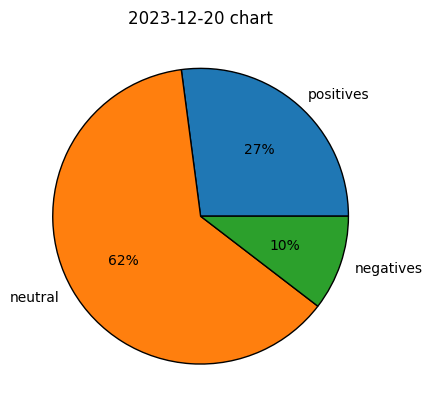

postives=39, neutral=90, negatives=15

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
25947,Received $379 BTC from an unknown source - why/how?,1.703030e+09,0.91,152,71,BTC,0,2023-12-20 00:00:07
25934,Is Bitcoin being spam attacked,1.703042e+09,0.81,70,177,BTC,-1,2023-12-20 03:13:47
25941,"three machines, almost 1TH hashrate, Is there any chance to mine Bitcoin?",1.703034e+09,0.85,45,60,BTC,1,2023-12-20 00:56:33
25735,Chart correlation: XNO/USD vs. BTC_FEEUSD (Bitcoin total fees in USD); What is next for nano?,1.703074e+09,0.78,33,43,BTC,0,2023-12-20 12:00:54
25911,113 Days Till BTC Halving.,1.703070e+09,0.81,33,3,BTC,0,2023-12-20 11:04:51
25917,Study Bitcoin > Buy Bitcoin,1.703063e+09,0.86,32,6,BTC,0,2023-12-20 09:09:22
25903,Will Bitcoin be in the top 5 next year?,1.703077e+09,0.90,29,9,BTC,1,2023-12-20 13:03:51
25926,Bitcoin can be either zero or hero no middle ground,1.703051e+09,0.72,16,23,BTC,1,2023-12-20 05:38:19
26032,Spot Bitcoin ETF could bring $30 trillion into the market: Grayscale CEO - same potencial for Ethereum ETF?,1.703074e+09,0.75,15,76,BTC,0,2023-12-20 12:00:07
25932,Using new bitcoin core v2 transport Protocol,1.703044e+09,1.00,12,5,BTC,0,2023-12-20 03:42:02



twitter Data 


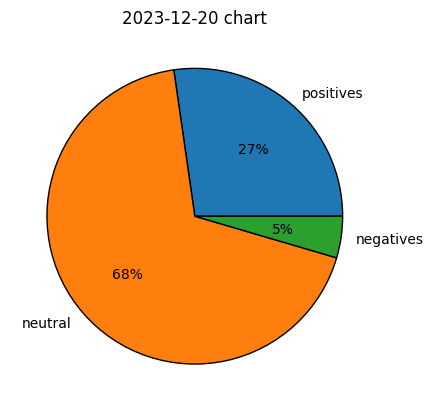

postives=6, neutral=15, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7380,Bitcoin ETF is a done deal. Wall Street is here. This is not priced in. gm plebs!,1700.0,191.0,65000.0,329.0,1703070248,BTC,0,2023-12-20 11:04:08
7379,"JUST IN: Bitcoin ETFs could attract up to $24 BILLION after approval, including 20% of demand from precious metal ETFs switching to Bitcoin - Matrixport",1000.0,67.0,39000.0,205.0,1703079538,BTC,1,2023-12-20 13:38:58
7204,"BITCOIN TO $200,000 BY 2025 STAGE 1 - ACCUMULATION STAGE 2 - BIG RUN AND THEN SOME CONSOLIDATION (ONGOING) STAGE 3 - PARABOLIC AND A MOVE TOWARDS $200,000THE REAL BULL RUN HAS NOT EVENSTARTED YET. ACCUMULATE THE QUALITY COINS NOW AND RETIRE IN 2025",533.0,130.0,29000.0,141.0,1703073952,BTC,0,2023-12-20 12:05:52
7196,Michael Saylor says that the Bitcoin spot ETF is Wall Street's biggest development in 30 Years.What do you think?,455.0,103.0,24000.0,56.0,1703060334,BTC,0,2023-12-20 08:18:54
7197,Bitcoin is set to EXPLODE on this DATE! BlackRock ETF is set - 99% Sure!Watch here >> https://youtu.be/OqXowJ8XWsg,359.0,137.0,55000.0,70.0,1703048277,BTC,0,2023-12-20 04:57:57
7443,"2,749 #BTC (116,666,038 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/bitcoin/14195901879316ae4f05ade416b3d7fb5037973e408cf30f1861c1fad8c9b80c…",312.0,25.0,66000.0,34.0,1703041981,BTC,0,2023-12-20 03:13:01
7445,"1,036 #BTC (43,875,927 USD) transferred from #Coinbase to unknown new wallethttps://whale-alert.io/transaction/bitcoin/adf6106ceb58b49e1f20f42faea3d6de26ddf511fe15ecadd90fafac28d2f36b…",214.0,19.0,48000.0,20.0,1703031381,BTC,0,2023-12-20 00:16:21
7437,"655 #BTC (27,933,688 USD) transferred from unknown wallet to #Binancehttps://whale-alert.io/transaction/bitcoin/3a797624e34988e8e1e9bbe932eafb3d674371cccdd3bf28d43dfa7c72df1e4f…",210.0,21.0,49000.0,24.0,1703052506,BTC,0,2023-12-20 06:08:26
7289,".@BlackRock, @Nasdaq, and @SECgov had the second meeting in less than a month regarding rule changes needed to allow for a bitcoin ETF listing. @thesamreynolds reports.",209.0,30.0,28000.0,55.0,1703050964,BTC,1,2023-12-20 05:42:44
7444,"2,241 #BTC (94,811,529 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/bitcoin/950f922c4dde120ffb97dba4e8f3b534fba05f15fb39a2c513f68e97306b80d3…",198.0,17.0,50000.0,21.0,1703036481,BTC,0,2023-12-20 01:41:21





ETH 
Reddit Data 


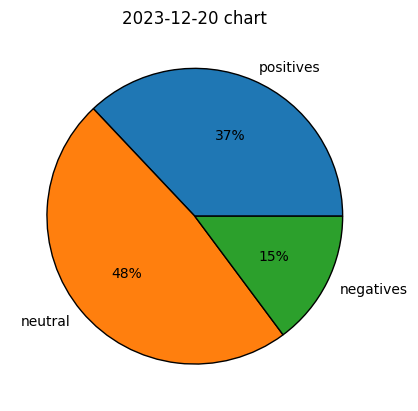

postives=10, neutral=13, negatives=4

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
25577,Ains Domains $AINS | Ai Name service | Launching ON 22nd Dec | Similar to ENS .eth but better | Huge Influencers already on board,1.703056e+09,0.98,503,3,ETH,1,2023-12-20 07:02:07
25613,Vitalik Buterin Donates 500 ETH ($1.1M) to Coinbase Prime.,1.703060e+09,0.89,20,12,ETH,0,2023-12-20 08:08:05
26033,Ethereum (ETH) Poised to Reach $3500. Is a Christmas Rally on the Horizon? 🎅🚀,1.703072e+09,0.65,14,96,ETH,1,2023-12-20 11:40:14
26035,Did You Trade Ethereum NFTs in the Last Two Years? You Can Claim This Airdrop - Decrypt,1.703064e+09,0.73,12,44,ETH,0,2023-12-20 09:28:13
26037,SEC Delays Several Ethereum ETFs Pushing Final Decision to May,1.703064e+09,0.75,12,33,ETH,0,2023-12-20 09:13:46
26048,The Market is still looking Bullish. Is $3000 ETH still possible. Comparing the charts. Ethereum analysis - Dec. 19 2023.,1.703040e+09,0.66,11,36,ETH,0,2023-12-20 02:46:28
26044,Ethereum proof-of-work core development team disbands,1.703050e+09,0.68,11,23,ETH,0,2023-12-20 05:20:42
26135,"SOL>ETH, here's why it's going to win",1.703068e+09,0.71,10,13,ETH,1,2023-12-20 10:22:00
26040,A Bullish Case for Ethereum—Why ETH Could Skyrocket in 2024,1.703059e+09,0.68,9,34,ETH,0,2023-12-20 07:59:22
26042,What future do you see for Donuts and ETH in the year 2024?!,1.703058e+09,0.64,7,19,ETH,0,2023-12-20 07:44:14



twitter Data 


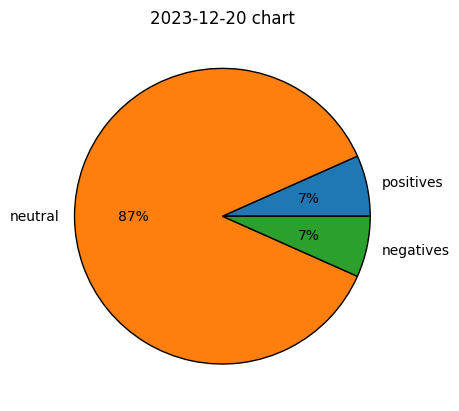

postives=1, neutral=13, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7446,"87,500,000 #USDC (87,501,531 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/ethereum/0x22e0146fade71869d2675f690ece81d5254378afb4d7b10b505bda95922bfa15…",186.0,31.0,48000.0,19.0,1703031077,ETH,0,2023-12-20 00:11:17
7433,"7,000,000 #MATIC (5,441,118 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/ethereum/0x14e09a484dcf3c44761a619fddef402ad507f04f449eb09ac674d36146c70658…",167.0,23.0,47000.0,19.0,1703062172,ETH,0,2023-12-20 08:49:32
7431,"16,123 #ETH (35,685,329 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/ethereum/0x3429e8cbb45eb50902d9ae35944ec86c8ce261c60f6e01d7ffc7ef02ada7ec4f…",162.0,28.0,40000.0,18.0,1703066852,ETH,0,2023-12-20 10:07:32
7438,"7,565,739 #MATIC (5,877,133 USD) transferred from unknown wallet to Polygon Stakinghttps://whale-alert.io/transaction/ethereum/0x1e70f48814d6ca1952fb9ddcf3109339193ba6379d7226c4dc61d2706675948c…",152.0,18.0,41000.0,16.0,1703051632,ETH,0,2023-12-20 05:53:52
7434,"9,000,000 #MATIC (6,999,507 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/ethereum/0x633d56da79d28ae7a19e58448249986e36bc80669e6471736f55e076542c357c…",143.0,15.0,39000.0,17.0,1703061807,ETH,0,2023-12-20 08:43:27
7429,"56,400,000 #USDT (56,401,522 USD) transferred from #Kraken to unknown wallethttps://whale-alert.io/transaction/ethereum/0x276a9662bbd93455cd83f0ef761e2d35b6d8c0efc7ba14bb315ba5089f9f985e…",133.0,18.0,35000.0,15.0,1703074182,ETH,0,2023-12-20 12:09:42
7436,"12,000 #ETH (26,462,236 USD) transferred from unknown wallet to #GateIOhttps://whale-alert.io/transaction/ethereum/0xb40c510587847071f52a1ffa05b37de17c623d48e7ee73bd2f54d29845b74d14…",132.0,59.0,40000.0,12.0,1703055667,ETH,0,2023-12-20 07:01:07
7435,"10,000,000 #MATIC (7,777,230 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/ethereum/0x4fb8699db7075b2344ac83e57476d4a1a32991f72e2cfbe59d8e6fa4810a85d1…",116.0,15.0,36000.0,12.0,1703061797,ETH,0,2023-12-20 08:43:17
7439,"39,362,761 #MATIC (30,486,560 USD) transferred from unknown wallet to unknown wallethttps://whale-alert.io/transaction/ethereum/0xe4cd95dbc9ea337858801bdc240a010c9ebdb258166811f7043366196949445c…",115.0,10.0,39000.0,9.0,1703051062,ETH,0,2023-12-20 05:44:22
7440,"30,860,000 #MATIC (23,897,518 USD) transferred from unknown wallet to unknown wallethttps://whale-alert.io/transaction/ethereum/0x0cbd60e8247c26cc05edafa4d93326a38a46bf94898dcf8fc1ec0cf6824e55e0…",98.0,11.0,37000.0,4.0,1703050997,ETH,0,2023-12-20 05:43:17





ETC 
the dataframe is empty in this day: 2023-12-20

the dataframe is empty in this day: 2023-12-20



Avalanche(AVAX) 
Reddit Data 


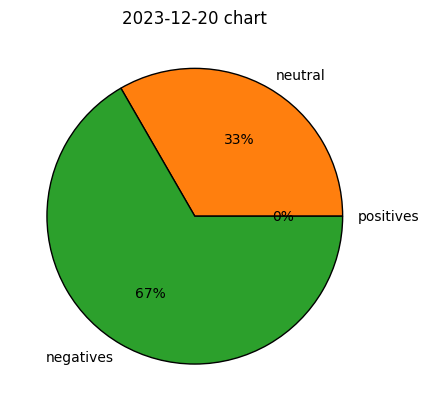

postives=0, neutral=1, negatives=2

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
26200,I've now tried to buy COQ INU twice using MetaMask through Trader Joe. It keeps taking my gas fees (0.2 AVAX) but the transactions fail. What am I doing wrong?,1.703052e+09,0.86,5,13,Avalanche(AVAX),-1,2023-12-20 06:05:57
26198,WHY IS C CHAIN SUSPENDED FROM MOST PLATFORMS I WANT TO BUY AVAX MEMECOINS VUT I CANT SEND AVAX TO MY WALLET,1.703054e+09,0.50,0,27,Avalanche(AVAX),-1,2023-12-20 06:29:23
26201,Sending avax from avalanche wallet to coinbase,1.703032e+09,0.50,0,8,Avalanche(AVAX),0,2023-12-20 00:33:17



twitter Data 


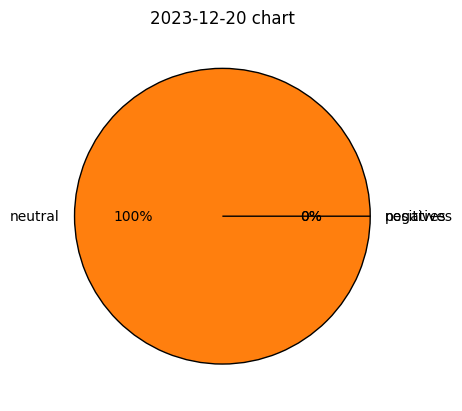

postives=0, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7288,"$COQ has been Avalanche’s shining star in recent weeks. Data shows the tokens have over 30,000 unique holders as of Tuesday, and saw $30 million in trading volumes in the past 24 hours. By @shauryamalwa",798.0,114.0,64000.0,313.0,1703061255,Avalanche(AVAX),0,2023-12-20 08:34:15





Solana(SOL) 
Reddit Data 


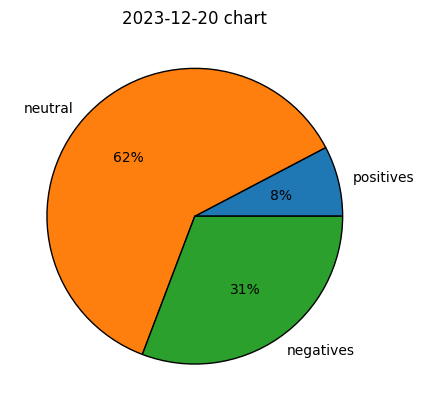

postives=1, neutral=8, negatives=4

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
26132,$PONKI - announcement New Year gift for all Solana Mobile users.,1.703071e+09,0.94,38,2,Solana(SOL),1,2023-12-20 11:21:39
26136,Solana just flipped XRP what's next?,1.703068e+09,1.00,18,13,Solana(SOL),0,2023-12-20 10:19:46
26134,We just flipped XRP!!! More seriously the projects on SOL are starting to stand out,1.703068e+09,1.00,13,2,Solana(SOL),-1,2023-12-20 10:23:57
26133,Worst Phone of the Year - Solana Saga - MKBHD (2023),1.703070e+09,0.90,7,3,Solana(SOL),-1,2023-12-20 10:58:56
26148,Help - Got my SOL Hacked but it's still there,1.703033e+09,0.80,6,9,Solana(SOL),0,2023-12-20 00:45:52
26131,Will Jito Become the Lido of Solana? AKA Uncomfortably Important to the Entire Blockchain,1.703072e+09,1.00,5,1,Solana(SOL),-1,2023-12-20 11:26:48
26126,"Using Phantom (IOS) app, is there a way to see the price at which I sold Solana? In other words, if I sold Solana at $76.5, how do I view that on app?",1.703077e+09,1.00,3,4,Solana(SOL),0,2023-12-20 12:49:33
26120,XRP mods are down bad! They were pissed when I let them know SOL beat XRPs marketcap,1.703084e+09,1.00,3,1,Solana(SOL),-1,2023-12-20 14:50:16
26125,60 days ago I called the Solana run and made $60K+. Dont miss the next run soon,1.703077e+09,0.67,2,5,Solana(SOL),0,2023-12-20 12:58:23
26123,Any Shopify Stores that use Solana Pay?,1.703081e+09,1.00,2,1,Solana(SOL),0,2023-12-20 14:08:47



twitter Data 


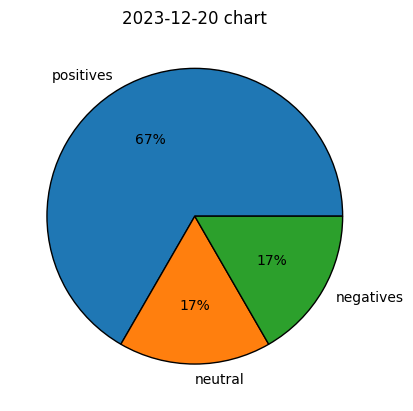

postives=4, neutral=1, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7205,BREAKING $SOL JUST FLIPPED XRP'S MARKET CAP.SOLANA IS NOW A TOP 5 CRYPTO!,1100.0,237.0,57000.0,249.0,1703070447,Solana(SOL),1,2023-12-20 11:07:27
7192,$SOL just FLIPPED $XRP! Solana is now a top 5 crypto!,1000.0,187.0,50000.0,198.0,1703068721,Solana(SOL),1,2023-12-20 10:38:41
7281,Do thine eyes deceive me? Did $SOL just break into the top 5 on CMC?!,535.0,103.0,45000.0,56.0,1703071308,Solana(SOL),-1,2023-12-20 11:21:48
7223,"Introducing ""Technical Deep Dive: Parallel Execution"", the first of our #Binance Technical Series. Peer beneath the surface to uncover the intricacies of parallel computing, a technique leveraged by Solana and other prominent blockchains.Read on",252.0,54.0,62000.0,69.0,1703061714,Solana(SOL),1,2023-12-20 08:41:54
7256,What are your thoughts on $SOL right now?,65.0,95.0,4000.0,9.0,1703073724,Solana(SOL),0,2023-12-20 12:02:04
7410,"RWA platform Ondo Finance has announced the expansion of its flagship products USDY and OUSG to the Solana and its protocols such as Orca and Raydium. USDY is a tokenized note backed by short-term U.S. Treasuries and bank demand deposits, and OUSG is the wrapper product of…",57.0,7.0,13000.0,10.0,1703036483,Solana(SOL),1,2023-12-20 01:41:23





Monero(XMR) 
Reddit Data 


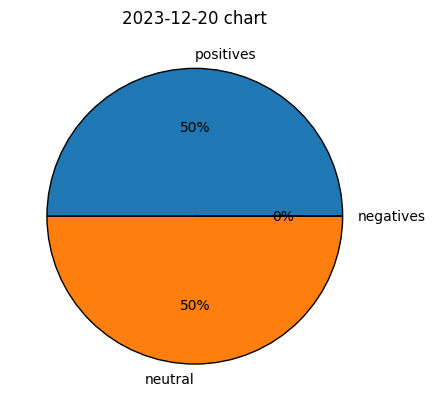

postives=1, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
26185,"Join the MyMonero team, along with Fluffypony at the Monero Meet Up this Friday in Cape Town, South Africa",1.703080e+09,0.67,2,0,Monero(XMR),1,2023-12-20 13:54:35
26186,Monero Meet Up with Fluffypony,1.703080e+09,0.67,1,0,Monero(XMR),0,2023-12-20 13:52:18



the dataframe is empty in this day: 2023-12-20



Optimism(OP) 
the dataframe is empty in this day: 2023-12-20

twitter Data 


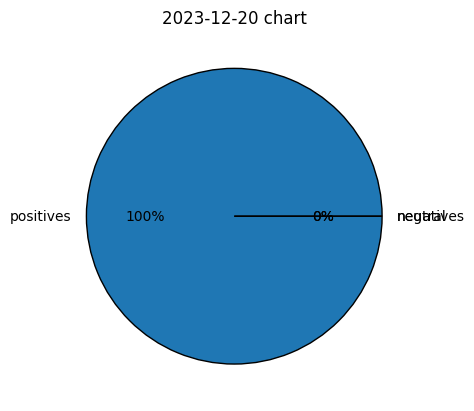

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7387,Let’s uncover the hottest pairs on #Optimism last 24 hours! $WLD @worldcoin $SNX @synthetix_io $VELO @VelodromeFi$TUX @magicaltux_op$SONNE @SonneFinanceWhich pairs are you currently trading on #Optimism? Share your favorites in the comments below! …,16.0,11.0,1000.0,8.0,1703047394,Optimism(OP),1,2023-12-20 04:43:14





PAX Gold(PAXG) 
the dataframe is empty in this day: 2023-12-20

the dataframe is empty in this day: 2023-12-20



Ripple(XRP) 
Reddit Data 


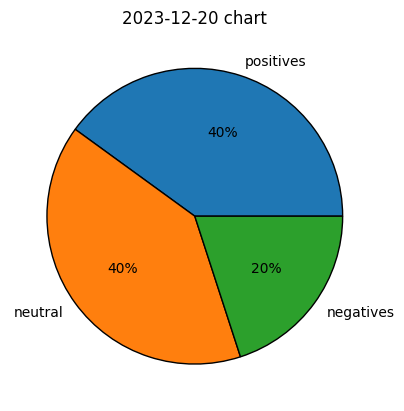

postives=2, neutral=2, negatives=1

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
26512,Uphold vault for xrp?,1.703050e+09,0.90,7,6,Ripple(XRP),0,2023-12-20 05:20:43
26096,Ripple Added to Central Bank of Ireland's Virtual Asset Service Providers Register | Ripple,1.703073e+09,1.00,7,0,Ripple(XRP),1,2023-12-20 11:43:17
25607,Ripple Receives Green Light as Digital Asset Service Operator in Ireland,1.703074e+09,1.00,2,0,Ripple(XRP),1,2023-12-20 12:07:16
26510,How do you revoke a trustline on XRP Toolkit?,1.703070e+09,1.00,1,0,Ripple(XRP),0,2023-12-20 11:06:32
26511,New to this sub. Frankly new to XRP.. just making a chart analysis. Correct if I may be missing info due to something not technical.,1.703055e+09,0.35,0,16,Ripple(XRP),-1,2023-12-20 06:42:03



twitter Data 


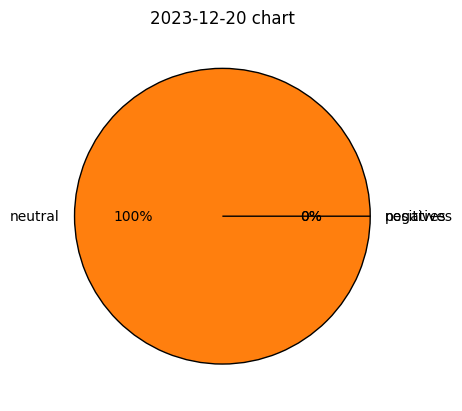

postives=0, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7442,"22,000,000 #XRP (13,321,059 USD) transferred from unknown wallet to #Bitstamphttps://whale-alert.io/transaction/ripple/E4E618047D1EA1AE94540C0A08D333CC13477159D230ABD686044696D775142E…",155.0,24.0,49000.0,15.0,1703046273,Ripple(XRP),0,2023-12-20 04:24:33





Arbitrum(ARB) 
the dataframe is empty in this day: 2023-12-20

twitter Data 


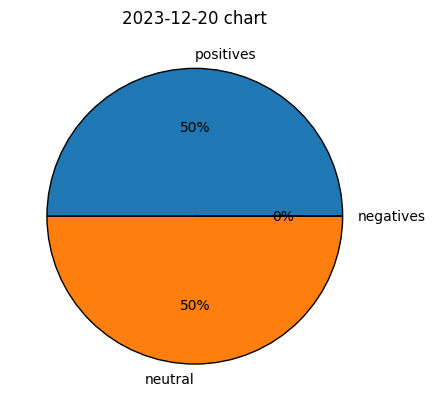

postives=1, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7201,Keep and eye on ggQuest on Arbitrum,216.0,12.0,29000.0,41.0,1703030734,Arbitrum(ARB),0,2023-12-20 00:05:34
7199,"Thank you to everyone who attended and spoke at #ArbitrumDAODayWe had a great time bringing the community together and having insightful conversations to help grow the ecosystem we all love!In case you missed it, you can now listen to all the talks",186.0,22.0,16000.0,26.0,1703034805,Arbitrum(ARB),1,2023-12-20 01:13:25





Binance(BNB) 
the dataframe is empty in this day: 2023-12-20

twitter Data 


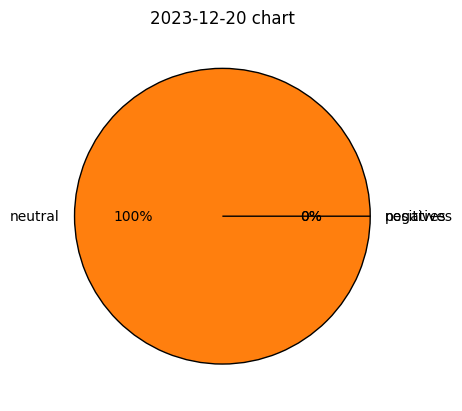

postives=0, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7227,"Farming is now open for the latest #Binance Launchpool – @nfpromptStake your #BNB, $FDUSD & $TUSD over the next 5 days to earn $NFPFarm now https://binance.onelink.me/y874/xju8mv81?af_force_deeplink=true&ref=AZTKZ9XS&utm_source=BinanceTwitter&utm_medium=GlobalSocial&utm_campaign=GlobalSocial…",1200.0,278.0,142000.0,282.0,1703030442,Binance(BNB),0,2023-12-20 00:00:42





Cardano(ADA) 
Reddit Data 


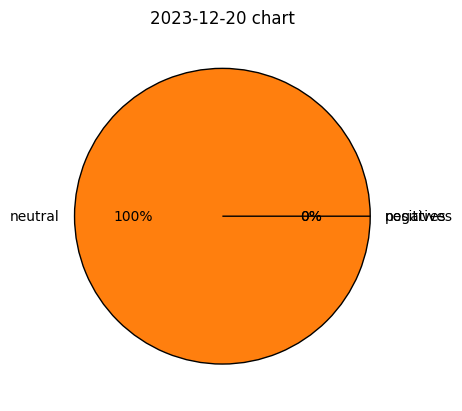

postives=0, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
26547,CARDANO | ADA | Awakening of a power? (German with english subtitles),1.703061e+09,0.89,7,1,Cardano(ADA),0,2023-12-20 08:33:57



twitter Data 


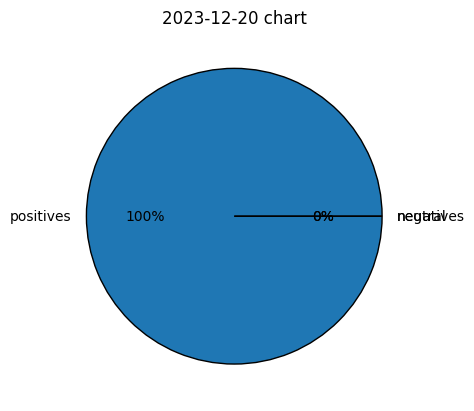

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7252,GM #CardanoCommunity! What's the most exciting highlight/news you are looking forward to this week?,75.0,20.0,17000.0,14.0,1703062408,Cardano(ADA),1,2023-12-20 08:53:28





Cosmos(ATOM) 
the dataframe is empty in this day: 2023-12-20

the dataframe is empty in this day: 2023-12-20



Litecoin(LTC) 
the dataframe is empty in this day: 2023-12-20

twitter Data 


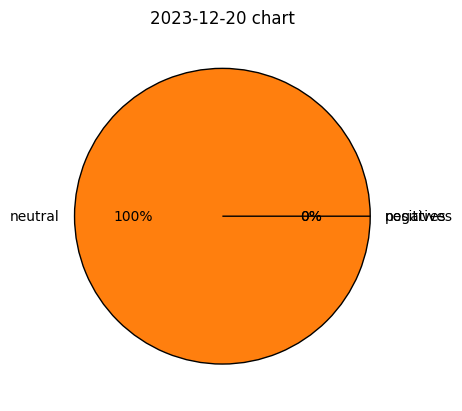

postives=0, neutral=3, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7430,"423,003 #LTC (29,986,690 USD) transferred from unknown wallet to unknown wallethttps://whale-alert.io/transaction/litecoin/b0524fa0cae9944cf5c53e13abf9ecaeef733a6664c5c3cb8367a1fcdfaa3e21…",115.0,20.0,34000.0,14.0,1703073344,Litecoin(LTC),0,2023-12-20 11:55:44
7428,"423,003 #LTC (29,890,194 USD) transferred from unknown wallet to unknown wallethttps://whale-alert.io/transaction/litecoin/4c360a6f85aeb1125100d18fadf3e4e1dd290d47b67651ababc9ba1d8bd8233d…",95.0,17.0,33000.0,9.0,1703074394,Litecoin(LTC),0,2023-12-20 12:13:14
7427,"413,003 #LTC (29,234,566 USD) transferred from unknown wallet to unknown wallethttps://whale-alert.io/transaction/litecoin/543b316672274871719ba4c79570b9b2b15849ba7391c0a14b52e9b599966241…",77.0,17.0,32000.0,5.0,1703075779,Litecoin(LTC),0,2023-12-20 12:36:19





Chainlink(LINK) 
Reddit Data 


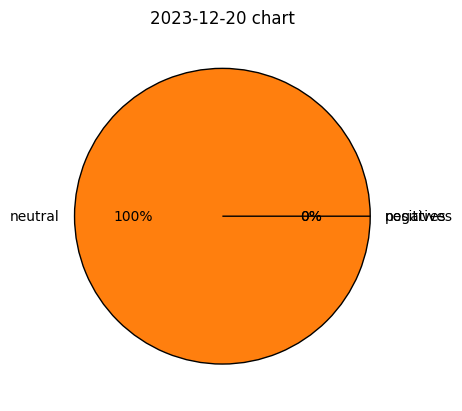

postives=0, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
25730,Chainlink (LINK) and ERC-20 fees - will they ever come back down or should I move on?,1.703081e+09,0.67,2,7,Chainlink(LINK),0,2023-12-20 14:01:00
26235,Chainlink (LINK) and ERC-20 fees - will they ever come back down or should I move on? (x-post from /r/Cryptocurrency),1.703082e+09,1.00,1,0,Chainlink(LINK),0,2023-12-20 14:21:07



twitter Data 


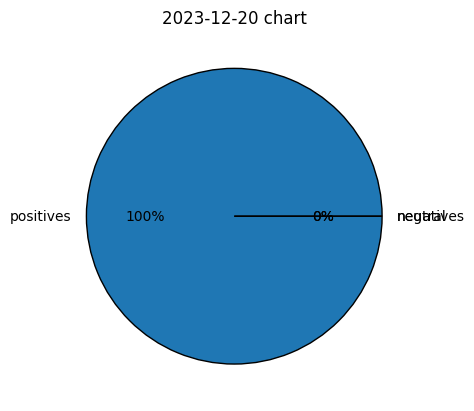

postives=3, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7245,Want to be one of the first to know who won Constellation: A Chainlink Hackathon?Attend the closing ceremony tomorrow at 4-4:30PM ET. Get notified when it's live,308.0,10.0,21000.0,48.0,1703041620,Chainlink(LINK),1,2023-12-20 03:07:00
7246,Solidity devs:Follow along with @thergdev to learn how to register an Upkeep using the #Chainlink Automation Job Scheduler to schedule time-based smart contract automation jobs with Chainlink Automation 2.0.Watch the full tutorial,282.0,16.0,16000.0,38.0,1703030820,Chainlink(LINK),1,2023-12-20 00:07:00
7371,This is definitely a project to keep in mind @SupraOracles $SUPRA Chainlink is great SUPRA will blow minds,5.0,2.0,362.0,2.0,1703054597,Chainlink(LINK),1,2023-12-20 06:43:17





Aave(AAVE) 
the dataframe is empty in this day: 2023-12-20

the dataframe is empty in this day: 2023-12-20



Polygon(MATIC) 
Reddit Data 


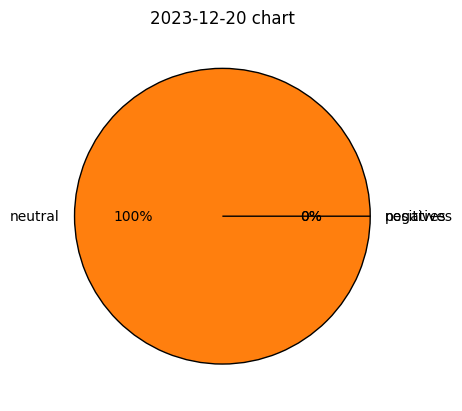

postives=0, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
26517,Daily Polygon Discussion Thread,1.703050e+09,1.0,1,0,Polygon(MATIC),0,2023-12-20 05:30:08
25658,Help with wrong trx: are u integrated with Polygon?,1.703038e+09,0.5,0,3,Polygon(MATIC),0,2023-12-20 02:04:10



twitter Data 


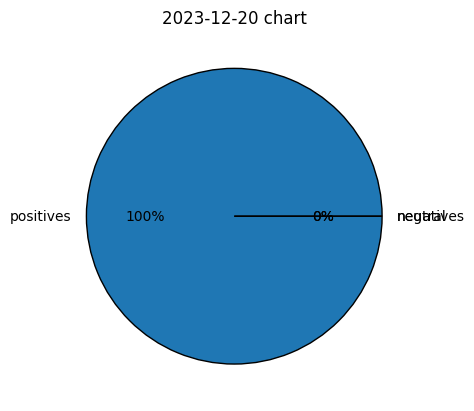

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
7390,"The Polygon Village Council. It’s the guiding star of the Village foundation; let’s talk more about it.What is it? It’s a group of web3 experts with members from Polygon Labs and Village ecosystem members, like accelerators and seasoned founders. The purpose is to establish an…",113.0,33.0,15000.0,25.0,1703080580,Polygon(MATIC),1,2023-12-20 13:56:20





Gas(GAS) 
Reddit Data 


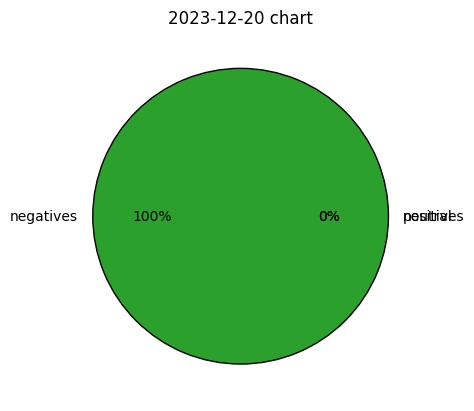

postives=0, neutral=0, negatives=2

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
25835,Gas Prices Soar Due to Inscription Spam on Testnets!,1.703053e+09,1.0,1,0,Gas(GAS),-1,2023-12-20 06:10:39
26199,Gas Prices Soar Due to Inscription Spam on Testnets!,1.703053e+09,0.5,0,5,Gas(GAS),-1,2023-12-20 06:09:03



the dataframe is empty in this day: 2023-12-20



Cronos(CRO) 
the dataframe is empty in this day: 2023-12-20

the dataframe is empty in this day: 2023-12-20


In [4]:
startDateObject=datetime.date(2023,12,20)
endDateObject=datetime.date(2023,12,20)

coinNames =[
"BTC",
"ETH", 
"ETC",
"Avalanche(AVAX)",
"Solana(SOL)",
"Monero(XMR)",
"Optimism(OP)",
"PAX Gold(PAXG)",
"Ripple(XRP)", 
"Arbitrum(ARB)",
"Binance(BNB)",
"Cardano(ADA)",
"Cosmos(ATOM)",
"Litecoin(LTC)",
"Chainlink(LINK)", 
"Aave(AAVE)",
"Polygon(MATIC)",
"Gas(GAS)",
"Cronos(CRO)",
]

for coinName in coinNames:
    print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"\n\n\n{coinName} ",end=Style.RESET_ALL+Back.RESET+Fore.RESET)
    sentiment_anayled_piechart_of_coin(start_dateObj=startDateObject,end_dateObj=endDateObject,coinName=coinName)
    